#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Import data

In [2]:
data = pd.read_csv("../data/offense_weekly_data.csv", parse_dates=["birth_date"])
data.head()

,id,name,position,team,season,week,season_type,opponent_team,completions,attempts,...,round,overall,forty,bench,vertical,index,offense_snaps,teams_offense_snaps,offense_pct,years_played
0,1045,A.J. Brown,WR,TEN,2019,1,REG,CLE,0,0,...,2.0,51.0,4.49,19.0,36.5,237.0,25.0,60.0,0.42,1.0
1,1045,A.J. Brown,WR,TEN,2019,2,REG,IND,0,0,...,2.0,51.0,4.49,19.0,36.5,2254.0,27.0,59.0,0.46,1.0
2,1045,A.J. Brown,WR,TEN,2019,3,REG,JAX,0,0,...,2.0,51.0,4.49,19.0,36.5,2920.0,39.0,80.0,0.49,1.0
3,1045,A.J. Brown,WR,TEN,2019,4,REG,ATL,0,0,...,2.0,51.0,4.49,19.0,36.5,4433.0,26.0,62.0,0.42,1.0
4,1045,A.J. Brown,WR,TEN,2019,5,REG,BUF,0,0,...,2.0,51.0,4.49,19.0,36.5,6346.0,37.0,58.0,0.64,1.0


In [3]:
# Number of rows, columns
data.shape

(55014, 73)

In [4]:
# Data types for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55014 entries, 0 to 55013
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           55014 non-null  int64         
 1   name                         55014 non-null  object        
 2   position                     55014 non-null  object        
 3   team                         55014 non-null  object        
 4   season                       55014 non-null  int64         
 5   week                         55014 non-null  int64         
 6   season_type                  55014 non-null  object        
 7   opponent_team                55014 non-null  object        
 8   completions                  55014 non-null  int64         
 9   attempts                     55014 non-null  int64         
 10  passing_yards                55014 non-null  float64       
 11  passing_tds                  55014 non-nu

#### Transform Data

In [5]:
# 2023 wide receiver stats by player, game
wr_2023_season = data.copy()
wr_2023_season = data[(data["season"] == 2023) & (data["position"] == "WR")].reset_index()
wr_2023_season.drop("level_0", axis=1, inplace=True)
wr_2023_season.head()

,id,name,position,team,season,week,season_type,opponent_team,completions,attempts,...,round,overall,forty,bench,vertical,index,offense_snaps,teams_offense_snaps,offense_pct,years_played
0,1045,A.J. Brown,WR,PHI,2023,1,REG,NE,0,0,...,2.0,51.0,4.49,19.0,36.5,1166.0,60.0,66.0,0.91,5.0
1,1045,A.J. Brown,WR,PHI,2023,2,REG,MIN,0,0,...,2.0,51.0,4.49,19.0,36.5,2322.0,74.0,78.0,0.96,5.0
2,1045,A.J. Brown,WR,PHI,2023,3,REG,TB,0,0,...,2.0,51.0,4.49,19.0,36.5,4222.0,66.0,81.0,0.82,5.0
3,1045,A.J. Brown,WR,PHI,2023,4,REG,WAS,0,0,...,2.0,51.0,4.49,19.0,36.5,5853.0,68.0,71.0,0.96,5.0
4,1045,A.J. Brown,WR,PHI,2023,5,REG,LA,0,0,...,2.0,51.0,4.49,19.0,36.5,7110.0,78.0,79.0,0.99,5.0


#### Clustering

In [6]:
# For newer versions of Python/Jupyter, change default so that method config attributes always show
from sklearn import set_config
set_config(print_changed_only=False, display='diagram')

In [7]:
# Select features
x = wr_2023_season.iloc[:, np.r_[30, 31, 32, 33, 37, 44, 52]]

In [10]:
# Import and run KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans.fit(x)

KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init='auto', random_state=None, tol=0.0001, verbose=0)

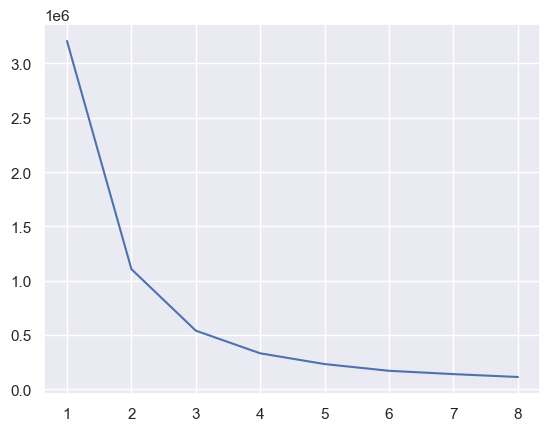

In [9]:
# Elbow graph to determine number of clusters
elbow = []

for i in range(1,9):
    kmeans = KMeans(i, n_init="auto")
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)
    
number_clusters = range(1,9)
plt.plot(number_clusters, elbow)
plt.show()

In [11]:
# Add clusters to initial data set
identified_clusters = kmeans.fit_predict(x)

data_with_clusters = wr_2023_season.copy()
data_with_clusters["Cluster"] = identified_clusters
data_with_clusters.head()

,id,name,position,team,season,week,season_type,opponent_team,completions,attempts,...,overall,forty,bench,vertical,index,offense_snaps,teams_offense_snaps,offense_pct,years_played,Cluster
0,1045,A.J. Brown,WR,PHI,2023,1,REG,NE,0,0,...,51.0,4.49,19.0,36.5,1166.0,60.0,66.0,0.91,5.0,0
1,1045,A.J. Brown,WR,PHI,2023,2,REG,MIN,0,0,...,51.0,4.49,19.0,36.5,2322.0,74.0,78.0,0.96,5.0,1
2,1045,A.J. Brown,WR,PHI,2023,3,REG,TB,0,0,...,51.0,4.49,19.0,36.5,4222.0,66.0,81.0,0.82,5.0,2
3,1045,A.J. Brown,WR,PHI,2023,4,REG,WAS,0,0,...,51.0,4.49,19.0,36.5,5853.0,68.0,71.0,0.96,5.0,2
4,1045,A.J. Brown,WR,PHI,2023,5,REG,LA,0,0,...,51.0,4.49,19.0,36.5,7110.0,78.0,79.0,0.99,5.0,2


In [12]:
data_with_clusters["Cluster"].value_counts()

Cluster
1    1310
0     711
2     199
Name: count, dtype: int64

In [13]:
cluster_zero = data_with_clusters[data_with_clusters["Cluster"] == 2]
cluster_zero["name"].value_counts(ascending=False).head()

name
Amon-Ra St. Brown    10
Tyreek Hill           9
CeeDee Lamb           9
A.J. Brown            8
Puka Nacua            7
Name: count, dtype: int64